# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다. 
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)  
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [3]:
target = 'Attrition'

## (1) Gender --> Attrition

In [4]:
feature = 'Gender'

* 교차표

In [5]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,403,598
1,66,129


In [6]:
pd.crosstab(data[target], data[feature], normalize = 'columns')
#없어보이는데..3% 차이는 IT회사에서 적지않은 비율이다

Gender,Female,Male
Attrition,,
0,0.859275,0.822558
1,0.140725,0.177442


* 시각화

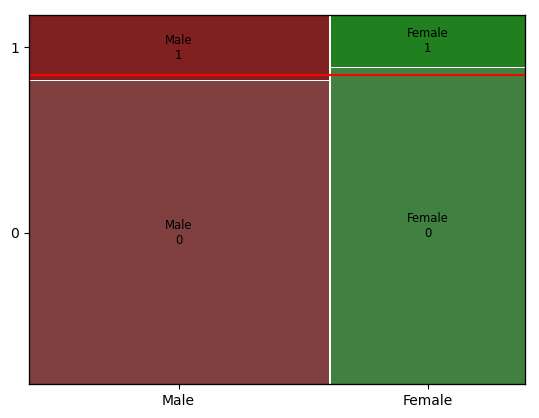

In [7]:
mosaic(data, [feature,target])
plt.axhline(1 - data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [8]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print(*result, sep="\n")
# print('카이제곱통계량', result[0])
# print('p-value', result[1])
# print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             403   598
1              66   129
----------------------------------------------------------------------------------------------------
2.5537631338119975
0.1100318964829815
1
[[392.5326087 608.4673913]
 [ 76.4673913 118.5326087]]


* 파악된 내용을 기술해 봅시다.

## (2) JobSatisfaction --> Attrition (직무만족도랑 이직율)

In [9]:
feature = "JobSatisfaction"
target = "Attrition"

In [20]:
def eda2_cc(data, target, feature):
    display(pd.crosstab(data[target], data[feature]))
    display(pd.crosstab(data[target], data[feature], normalize = "columns"))
    mosaic(data, [feature, target])
    plt.axhline(1 - data[target].mean(), color = 'r')
    plt.show()
    table = pd.crosstab(data[target], data[feature])
    print('-' * 30)
    result = spst.chi2_contingency(table)
    print(*result, sep="\n")

* 교차표

In [10]:
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,191,189,295,326
1,52,37,59,47


In [11]:
pd.crosstab(data[target], data[feature], normalize = "columns")

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.786008,0.836283,0.833333,0.873995
1,0.213992,0.163717,0.166667,0.126005


* 시각화

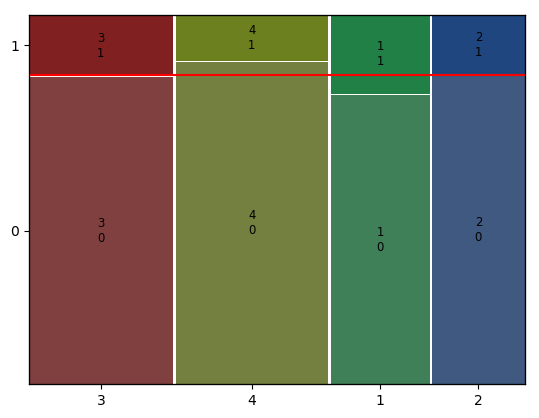

In [12]:
mosaic(data, [feature, target])
plt.axhline(1 - data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [13]:
table = pd.crosstab(data[feature], data[target])
spst.chi2_contingency(table)

(8.40684948576828,
 0.0383107376547955,
 3,
 array([[203.38043478,  39.61956522],
        [189.15217391,  36.84782609],
        [296.2826087 ,  57.7173913 ],
        [312.18478261,  60.81521739]]))

* 파악된 내용을 기술해 봅시다.

- 자유도  * 2 했을 때 카이제곱 통계량이 조금 커서 직무만족도와 이직률은 크게 관련이 없다..? 있기는 하다

## (3) MaritalStatus --> Attrition

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,241,479,281
1,23,69,103


MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.912879,0.874088,0.731771
1,0.087121,0.125912,0.268229


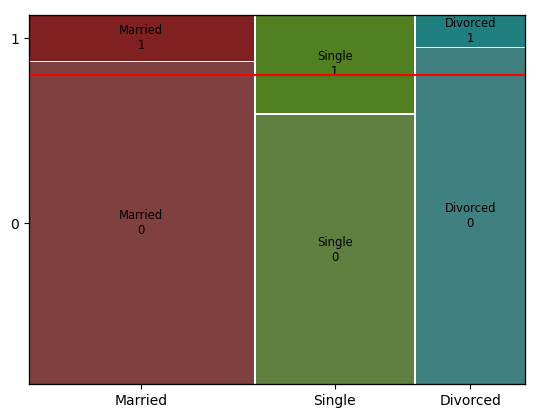

------------------------------
47.82247929575401
4.12553775054082e-11
2
[[220.95652174 458.65217391 321.39130435]
 [ 43.04347826  89.34782609  62.60869565]]


In [21]:
eda2_cc(data, "Attrition", "MaritalStatus")

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## (4) OverTime --> Attrition

OverTime,No,Yes
Attrition,,
0,764,237
1,90,105


OverTime,No,Yes
Attrition,,
0,0.894614,0.692982
1,0.105386,0.307018


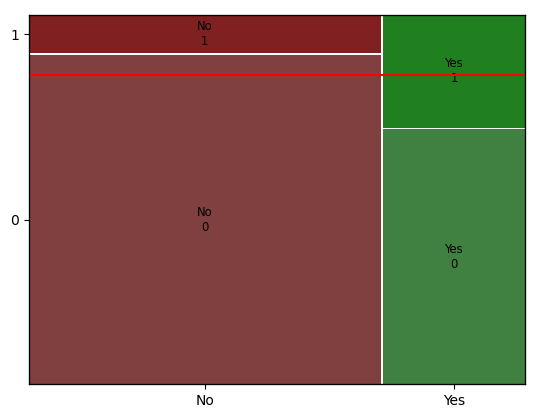

------------------------------
71.28471646317081
3.092218315896121e-17
1
[[714.76086957 286.23913043]
 [139.23913043  55.76086957]]


In [22]:
eda2_cc(data, "Attrition", "OverTime")

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [23]:
def eda2_nc(data, target, feature):
    plt.figure(figsize = (8, 10))
    plt.subplot(2, 1, 1)
    sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
    plt.grid()
    plt.subplot(2, 1, 2)
    sns.kdeplot(x = feature, data = data, hue = target, multiple = "fill")
    plt.axhline(data[target].mean(), color = 'r')
    plt.grid()
    plt.show()

In [12]:
feature = 'Age'

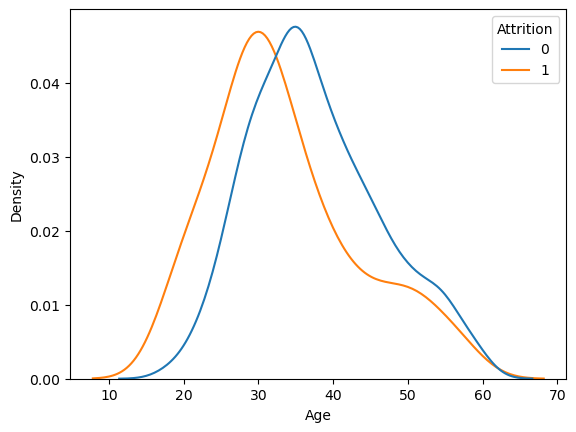

In [13]:
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.show()

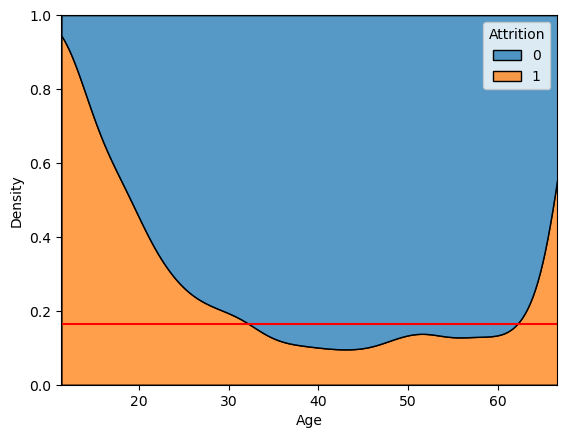

In [14]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (2) DistanceFromHome --> Attrition

In [24]:
feature = "DistanceFromHome"

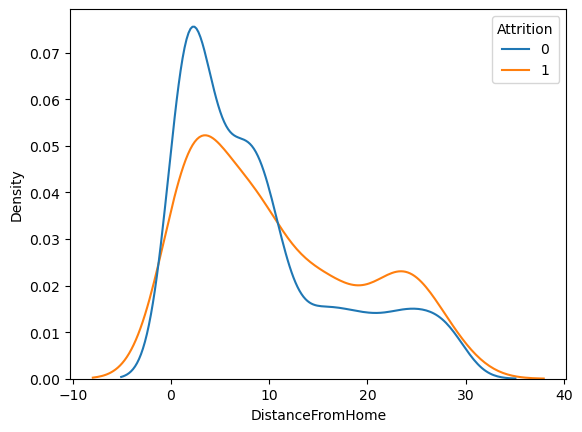

In [25]:
sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
plt.show()

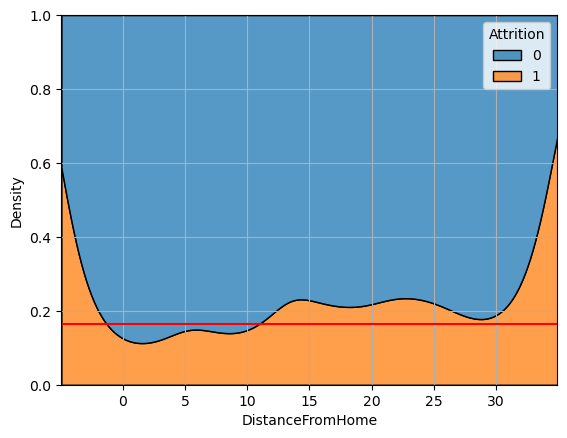

In [26]:
sns.kdeplot(x = feature, data = data, hue = target, multiple = "fill")
plt.axhline(data[target].mean(), color = "r")
plt.grid()
plt.show()

* 파악된 내용을 기술해 봅시다.

## (3) MonthlyIncome --> Attrition

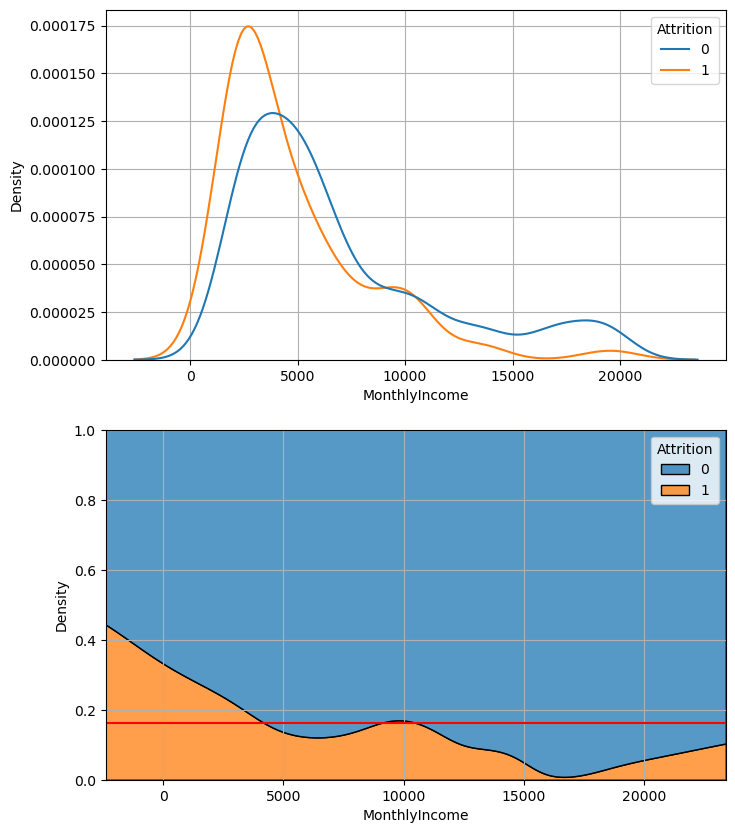

In [27]:
eda2_nc(data, target, "MonthlyIncome")

* 파악된 내용을 기술해 봅시다.

## (4) PercentSalaryHike --> Attrition

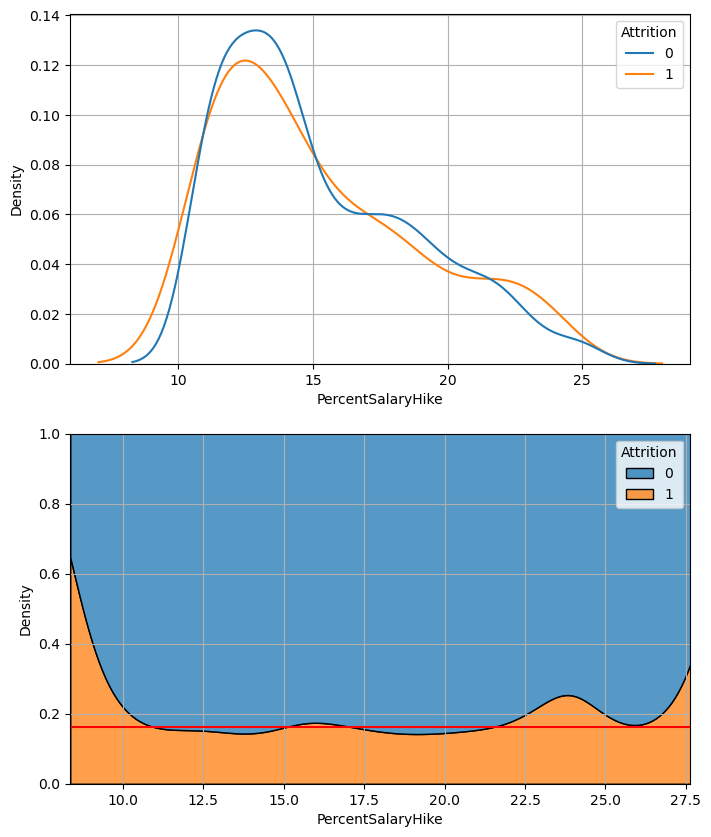

In [28]:
eda2_nc(data, target, "PercentSalaryHike")

* 파악된 내용을 기술해 봅시다.

## (5) TotalWorkingYears --> Attrition

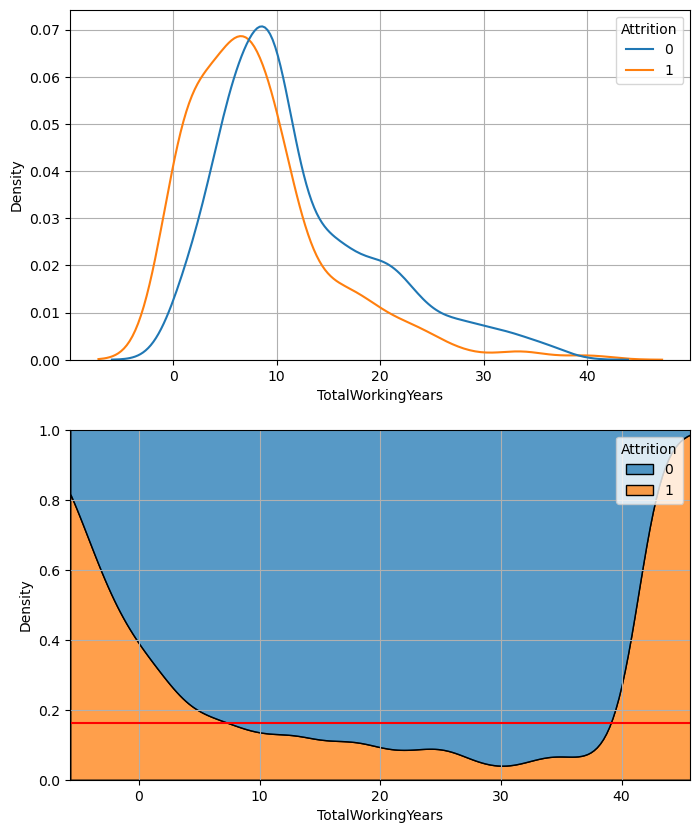

In [29]:
eda2_nc(data, target, "TotalWorkingYears")

* 파악된 내용을 기술해 봅시다.

# 4.관계 정리하기

① 강한관계

In [ ]:
#MaritalStatus, OverTime

② 중간관계

In [ ]:
#Age, DistanceFromHome, MonthlyIncome

③ 관계없음

In [ ]:
#Gender, JobSatisfaction, PercentSalaryHike, TotalWorkingYears